## Import Libraries

In [123]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1. Problem Statement

To predict the car price using various variables

Dependent Variable:
    'price'

Independent Variables:
    'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 

## 2. Data Gathering

In [2]:
df_autos = pd.read_csv('autos_dataset.csv')
df_autos.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [3]:
df_autos.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## 3. Exploratory Data Analysis

In [5]:
df_autos.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df_autos[df_autos['normalized-losses'] == '?'].shape

(41, 26)

In [7]:
df_autos.replace({'?':np.nan}, inplace=True)
df_autos.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
df_autos.isna().mean()*100

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
aspiration            0.00000
num-of-doors          0.97561
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
bore                  1.95122
stroke                1.95122
compression-ratio     0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64

## 3.1 symboling

In [9]:
df_autos['symboling']

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [10]:
df_autos['symboling'].nunique()

6

In [11]:
df_autos['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

## 3.2 normalized-losses

In [12]:
df_autos['normalized-losses']

0      NaN
1      NaN
2      NaN
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

mean >> If outliers are not present
median >> if outliers are present
KNN Imputer/Mice Imputer/Simple Imputer >> Small dataset with more than 10-15%

Null Values ratio >> Fill ratio

30% or more >> Drop Column

60000/200000

60000/400000

In [13]:
df_autos.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [14]:
df_autos['normalized-losses'] = df_autos['normalized-losses'].astype(float)

In [15]:
df_autos['normalized-losses'].mean()

122.0

In [16]:
df_autos['normalized-losses'].median()

115.0

<AxesSubplot:>

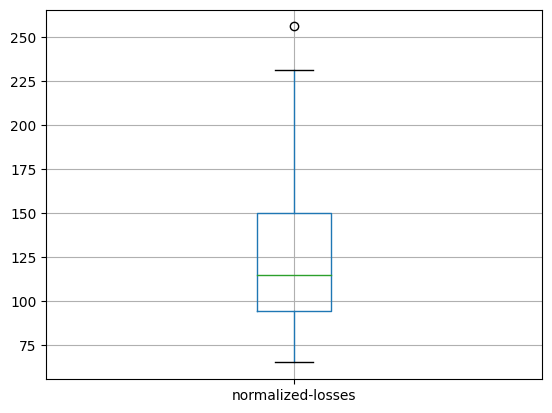

In [17]:
df_autos.boxplot('normalized-losses')

In [18]:
df_autos['normalized-losses'] = df_autos['normalized-losses'].fillna(df_autos['normalized-losses'].median())
df_autos['normalized-losses'] = df_autos['normalized-losses'].astype(int)

## 3.3 make

In [19]:
df_autos['make']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object

In [20]:
df_autos['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

## 3.4 fuel-type

In [21]:
df_autos['fuel-type']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 205, dtype: object

In [22]:
df_autos['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [23]:
df_autos['fuel-type'].replace({'diesel':0, 'gas':1}, inplace=True)
df_autos['fuel-type']

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: fuel-type, Length: 205, dtype: int64

## 3.5 aspiration

In [24]:
df_autos['aspiration']

0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object

In [25]:
df_autos['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [26]:
df_autos['aspiration'].replace({'std':1, 'turbo':0}, inplace=True)
df_autos['aspiration']

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    0
202    1
203    0
204    0
Name: aspiration, Length: 205, dtype: int64

## 3.6 num-of-doors

In [27]:
df_autos['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [28]:
df_autos['num-of-doors'].value_counts().to_dict()

{'four': 114, 'two': 89}

In [29]:
df_autos['num-of-doors'].replace({'four': 4, 'two': 2}, inplace=True)
df_autos['num-of-doors']

0      2.0
1      2.0
2      2.0
3      4.0
4      4.0
      ... 
200    4.0
201    4.0
202    4.0
203    4.0
204    4.0
Name: num-of-doors, Length: 205, dtype: float64

In [30]:
df_autos['num-of-doors'].fillna(df_autos['num-of-doors'].mode()[0], inplace=True)
df_autos['num-of-doors'] = df_autos['num-of-doors'].astype(int)

## 3.7 body-style

In [31]:
df_autos['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [32]:
df_autos = pd.get_dummies(df_autos, columns=['body-style'])
df_autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,115,alfa-romero,1,1,2,rwd,front,88.6,168.8,...,111,5000,21,27,13495,1,0,0,0,0
1,3,115,alfa-romero,1,1,2,rwd,front,88.6,168.8,...,111,5000,21,27,16500,1,0,0,0,0
2,1,115,alfa-romero,1,1,2,rwd,front,94.5,171.2,...,154,5000,19,26,16500,0,0,1,0,0
3,2,164,audi,1,1,4,fwd,front,99.8,176.6,...,102,5500,24,30,13950,0,0,0,1,0
4,2,164,audi,1,1,4,4wd,front,99.4,176.6,...,115,5500,18,22,17450,0,0,0,1,0


## 3.8 drive-wheels

In [33]:
df_autos['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [34]:
df_autos['drive-wheels'].value_counts().to_dict()

{'fwd': 120, 'rwd': 76, '4wd': 9}

In [35]:
df_autos['drive-wheels'].replace({'fwd': 2, 'rwd': 1, '4wd': 0}, inplace=True)
df_autos['drive-wheels']

0      1
1      1
2      1
3      2
4      0
      ..
200    1
201    1
202    1
203    1
204    1
Name: drive-wheels, Length: 205, dtype: int64

## 3.9 engine-location

In [36]:
df_autos['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [37]:
df_autos['engine-location'].replace({'front':1, 'rear':0}, inplace=True)
df_autos['engine-location']

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    1
204    1
Name: engine-location, Length: 205, dtype: int64

## 3.10 wheel-base

In [38]:
df_autos['wheel-base']

0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheel-base, Length: 205, dtype: float64

In [39]:
df_autos['wheel-base'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

In [40]:
df_autos['wheel-base'].skew()

1.0502137758714858

In [41]:
df_autos.boxplot('wheel-base')

<AxesSubplot:ylabel='Density'>

In [42]:
sns.boxplot(df_autos['wheel-base'])

<AxesSubplot:xlabel='wheel-base', ylabel='Density'>

In [43]:
df_autos[df_autos['wheel-base'] >= 114]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
70,-1,93,mercedes-benz,0,0,4,1,1,115.6,202.6,...,123,4350,22,25,31600,0,0,0,1,0
71,-1,115,mercedes-benz,1,1,4,1,1,115.6,202.6,...,155,4750,16,18,34184,0,0,0,1,0
73,0,115,mercedes-benz,1,1,4,1,1,120.9,208.1,...,184,4500,14,16,40960,0,0,0,1,0
109,0,115,peugot,1,1,4,1,1,114.2,198.9,...,97,5000,19,24,12440,0,0,0,0,1
110,0,115,peugot,0,0,4,1,1,114.2,198.9,...,95,4150,25,25,13860,0,0,0,0,1
113,0,115,peugot,1,1,4,1,1,114.2,198.9,...,95,5000,19,24,16695,0,0,0,0,1
114,0,115,peugot,0,0,4,1,1,114.2,198.9,...,95,4150,25,25,17075,0,0,0,0,1


In [44]:
df_autos['wheel-base'] = np.where(df_autos['wheel-base'] >= 114, df_autos['wheel-base'].mean(), df_autos['wheel-base'])

## 3.11 length

In [45]:
sns.kdeplot(df_autos['length'])

<AxesSubplot:xlabel='wheel-base', ylabel='Density'>

In [46]:
df_autos['length'].skew()

0.1559537713215604

## 3.12 width

In [47]:
sns.kdeplot(df_autos['width'])

<AxesSubplot:xlabel='wheel-base', ylabel='Density'>

In [48]:
df_autos['width'].skew()

0.904003498786254

In [49]:
sns.boxplot(df_autos['width'])

<AxesSubplot:xlabel='width', ylabel='Density'>

In [50]:
df_autos[df_autos['width']>=71].shape

(8, 30)

In [51]:
df_autos['width'] = np.where(df_autos['width'] >= 71, df_autos['width'].mean(), df_autos.width)

## 3.13 height

In [52]:
sns.kdeplot(df_autos['height'])

<AxesSubplot:xlabel='width', ylabel='Density'>

In [53]:
df_autos['height'].skew()

0.06312273247192804

## 3.14 curb-weight

In [54]:
sns.kdeplot(df_autos['curb-weight'])

<AxesSubplot:xlabel='width', ylabel='Density'>

In [55]:
sns.boxplot(df_autos['curb-weight'])

<AxesSubplot:xlabel='curb-weight', ylabel='Density'>

## 3.15 engine-type

In [56]:
df_autos['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [57]:
df_autos = pd.get_dummies(df_autos, columns=['engine-type'])
df_autos

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,115,alfa-romero,1,1,2,1,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
1,3,115,alfa-romero,1,1,2,1,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
2,1,115,alfa-romero,1,1,2,1,1,94.5,171.2,...,1,0,0,0,0,0,0,0,1,0
3,2,164,audi,1,1,4,2,1,99.8,176.6,...,0,1,0,0,0,0,1,0,0,0
4,2,164,audi,1,1,4,0,1,99.4,176.6,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,1,4,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0
201,-1,95,volvo,1,0,4,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0
202,-1,95,volvo,1,1,4,1,1,109.1,188.8,...,0,1,0,0,0,0,0,0,1,0
203,-1,95,volvo,0,0,4,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0


## 3.16 num-of-cylinders

In [58]:
df_autos['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [59]:
df_autos['num-of-cylinders'].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [60]:
df_autos['num-of-cylinders'].replace({'four': 4,
                                         'six': 6,
                                         'five': 5,
                                         'eight': 8,
                                         'two': 2,
                                         'three': 3,
                                         'twelve': 12}, inplace=True)
df_autos['num-of-cylinders']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: num-of-cylinders, Length: 205, dtype: int64

## 3.17 engine-size

In [61]:
sns.kdeplot(df_autos['engine-size'])

<AxesSubplot:xlabel='curb-weight', ylabel='Density'>

In [62]:
sns.boxplot(df_autos['engine-size'])

<AxesSubplot:xlabel='engine-size', ylabel='Density'>

In [63]:
df_autos[df_autos['engine-size']>=200].shape

(11, 36)

In [64]:
df_autos['engine-size'] = np.where(df_autos['engine-size']>=200, df_autos['engine-size'].mean(), df_autos['engine-size'])

## 3.18 fuel-system

In [65]:
df_autos['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [66]:
df_autos = pd.get_dummies(df_autos, columns=['fuel-system'])

## 3.19 bore

In [67]:
df_autos['bore']

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object

In [68]:
df_autos['bore'] = df_autos['bore'].astype(float)
df_autos['bore'].median()

3.31

In [69]:
df_autos['bore'].mean()

3.3297512437810943

In [70]:
df_autos['bore'].fillna(df_autos['bore'].mean(), inplace=True)

## 3.20 stroke

In [71]:
df_autos['stroke']

0      2.68
1      2.68
2      3.47
3       3.4
4       3.4
       ... 
200    3.15
201    3.15
202    2.87
203     3.4
204    3.15
Name: stroke, Length: 205, dtype: object

In [72]:
df_autos['stroke'] = df_autos['stroke'].astype(float)
df_autos[['stroke']].describe()

,stroke
count,201.000000
mean,3.255423
std,0.316717
min,2.070000
25%,3.110000
50%,3.290000
75%,3.410000
max,4.170000


In [73]:
df_autos['stroke'].fillna(df_autos['stroke'].mean(), inplace=True)

## 3.21 compression-ratio

In [74]:
sns.kdeplot(df_autos['compression-ratio'])

<AxesSubplot:xlabel='engine-size', ylabel='Density'>

In [75]:
sns.boxplot(df_autos['compression-ratio'])

<AxesSubplot:xlabel='compression-ratio', ylabel='Density'>

In [76]:
df_autos['compression-ratio'] = np.where(df_autos['compression-ratio']>=12, df_autos['compression-ratio'].mean(), df_autos['compression-ratio'])

## 3.22 horsepower

In [77]:
df_autos['horsepower'] = df_autos['horsepower'].astype(float)
df_autos['horsepower'].fillna(df_autos['horsepower'].mean(),inplace=True)
df_autos['horsepower'] = df_autos['horsepower'].astype(int)
df_autos['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: int32

## 3.23 peak-rpm

In [78]:
df_autos['peak-rpm']

0      5000
1      5000
2      5000
3      5500
4      5500
       ... 
200    5400
201    5300
202    5500
203    4800
204    5400
Name: peak-rpm, Length: 205, dtype: object

In [79]:
df_autos['peak-rpm'] = df_autos['peak-rpm'].astype(float)
df_autos['peak-rpm'].fillna(df_autos['peak-rpm'].mean(),inplace=True)
df_autos['peak-rpm'] = df_autos['peak-rpm'].astype(int)
df_autos['peak-rpm']

0      5000
1      5000
2      5000
3      5500
4      5500
       ... 
200    5400
201    5300
202    5500
203    4800
204    5400
Name: peak-rpm, Length: 205, dtype: int32

In [80]:
sns.kdeplot(df_autos['peak-rpm'])

<AxesSubplot:xlabel='compression-ratio', ylabel='Density'>

In [81]:
df_autos['peak-rpm'].skew()

0.07361410577798844

## 3.24 city-mpg

In [82]:
sns.kdeplot(df_autos['city-mpg'])

<AxesSubplot:xlabel='compression-ratio', ylabel='Density'>

In [83]:
df_autos['city-mpg'].skew()

0.6637040288148164

In [84]:
sns.boxplot(df_autos['city-mpg'])

<AxesSubplot:xlabel='city-mpg', ylabel='Density'>

In [85]:
df_autos['city-mpg'] = np.where(df_autos['city-mpg']>= 45, df_autos['city-mpg'].mean(), df_autos['city-mpg'])

## 3.25 highway-mpg

In [86]:
sns.kdeplot(df_autos['highway-mpg'])

<AxesSubplot:xlabel='city-mpg', ylabel='Density'>

## 3.26 price

In [87]:
df_autos['price'] = df_autos['price'].astype(float)
df_autos['price'] = df_autos['price'].fillna(df_autos['price'].mean())
df_autos['price'] = df_autos['price'].astype(int)

In [88]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    int32  
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    fl

## 5.  Feature Selection

1. Correlation:
    Cont vs Cont >> Pearson corr
    Cat vs Cat >> Chi-Square Test
    Cat vs Cont >> ANOVA

In [90]:
df_autos.corr()['price'].head(22).sort_values()

highway-mpg         -0.690526
city-mpg            -0.683408
drive-wheels        -0.475763
engine-location     -0.331013
aspiration          -0.177285
fuel-type           -0.110207
peak-rpm            -0.100851
compression-ratio   -0.095142
symboling           -0.082201
num-of-doors         0.041945
stroke               0.082095
normalized-losses    0.094337
height               0.134388
wheel-base           0.518249
bore                 0.532300
engine-size          0.596852
width                0.627157
length               0.682986
num-of-cylinders     0.687769
horsepower           0.757946
curb-weight          0.820825
price                1.000000
Name: price, dtype: float64

In [91]:
df_autos.corr()['price'].head(22).sort_values().head(4).index

Index(['highway-mpg', 'city-mpg', 'drive-wheels', 'engine-location'], dtype='object')

In [92]:
df_autos.corr()['price'].head(22).sort_values().tail(9).index

Index(['wheel-base', 'bore', 'engine-size', 'width', 'length',
       'num-of-cylinders', 'horsepower', 'curb-weight', 'price'],
      dtype='object')

In [93]:
df_autos.corr()['price'].head(22).sort_values()[4:13].index

Index(['aspiration', 'fuel-type', 'peak-rpm', 'compression-ratio', 'symboling',
       'num-of-doors', 'stroke', 'normalized-losses', 'height'],
      dtype='object')

## 6. Model Training

## Train Test Split

In [94]:
x = df_autos.drop(['aspiration', 'fuel-type', 'peak-rpm', 'compression-ratio', 'symboling',
       'num-of-doors', 'stroke', 'normalized-losses', 'height', 'price','make'], axis=1)
y = df_autos['price']

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [96]:
def model_building(algo, x, y):
    model = algo
    model.fit(x, y)
    return model

linear_reg = model_building(LinearRegression(), x_train, y_train)
linear_reg

LinearRegression()

## 7. Evaluation

In [97]:
y_pred = linear_reg.predict(x_test)
y_pred[:5]

array([ 5749.05226169, 14069.82195621,  9815.57919893, 13159.75980039,
       16110.44643867])

In [98]:
y_test[:5]

25      6692
84     14489
100     9549
10     16430
195    13415
Name: price, dtype: int32

In [99]:
def evaluation(model, ind_var, y_act):
    pred = model.predict(ind_var)
    
    mse = mean_squared_error(y_act, pred)
    print('MSE:', mse)

    rmse = np.sqrt(mse)
    print('RMSE:', rmse)

    mae = mean_absolute_error(y_act, pred)
    print('MAE:', mae)

    r_squared = r2_score(y_act, pred)
    print('R2_Score:',r_squared)
    
print('Test Data Evaluation'.center(50, '*'))
evaluation(linear_reg, x_test, y_test)

print()

print('Train Data Evaluation'.center(50, '*'))
evaluation(linear_reg, x_train, y_train)

***************Test Data Evaluation***************
MSE: 11766265.245345047
RMSE: 3430.1990095831243
MAE: 2347.4421057392433
R2_Score: 0.6590521320213542

**************Train Data Evaluation***************
MSE: 6046972.491260054
RMSE: 2459.0592695703886
MAE: 1719.0451789503004
R2_Score: 0.9115681963535316


## Ridge Regression

In [100]:
ridge_model = model_building(Ridge(alpha=5), x_train, y_train)
ridge_model

Ridge(alpha=5)

In [101]:
print('Test Data Evaluation'.center(50, '*'))
evaluation(ridge_model, x_test, y_test)

print()

print('Train Data Evaluation'.center(50, '*'))
evaluation(ridge_model, x_train, y_train)

***************Test Data Evaluation***************
MSE: 12629594.893777268
RMSE: 3553.814133262637
MAE: 2276.090427623147
R2_Score: 0.6340356635958977

**************Train Data Evaluation***************
MSE: 9879740.180652395
RMSE: 3143.205399055619
MAE: 2065.353446854051
R2_Score: 0.8555172452005779


## Lasso Regression

In [102]:
lasso_model = model_building(Lasso(alpha=5), x_train, y_train)
lasso_model

Lasso(alpha=5)

In [103]:
print('Test Data Evaluation'.center(50, '*'))
evaluation(lasso_model, x_test, y_test)

print()

print('Train Data Evaluation'.center(50, '*'))
evaluation(lasso_model, x_train, y_train)

***************Test Data Evaluation***************
MSE: 11425490.59183625
RMSE: 3380.1613263032655
MAE: 2299.976833950748
R2_Score: 0.6689266664766225

**************Train Data Evaluation***************
MSE: 6089106.472940572
RMSE: 2467.6114914914324
MAE: 1728.8091697676446
R2_Score: 0.9109520228881817


In [104]:
ridge_model.coef_

array([  305.61673255, -4035.69783751,    10.17510729,    45.52440908,
          19.89862354,     9.61009979,  1502.93602959,   -54.62077457,
         306.24784308,    31.62922409,  -132.78256957,   -28.48725877,
        2690.33938454,  1537.09453381,  -976.08431938,  -616.49646473,
       -2634.85313424,    42.96664437, -2969.80756363, -1465.68268748,
        1785.8231311 ,  1814.61940172,  -149.4659556 ,   941.54702953,
         711.08643107,   -81.50617949,   232.12955243,  1375.84624404,
           0.        ,  -299.81436979, -1462.12647896,  -475.6151993 ])

In [105]:
lasso_model.coef_

array([ 3.32161819e+02, -1.73430665e+04,  1.32782893e+02,  4.04210016e+01,
       -1.19039902e+02,  9.85637020e+00,  1.58166659e+03, -1.04467581e+02,
        3.32161827e+03,  4.53617928e+01, -1.61954628e+02,  1.98828177e+01,
        4.56949232e+03,  1.25817264e+03,  0.00000000e+00, -3.89119567e+02,
       -2.38754171e+03, -3.28289958e+02, -2.17988294e+04, -2.95367133e+03,
        1.84747406e+03, -0.00000000e+00,  2.79690521e+02,  8.67029238e+02,
        1.70890177e+03,  6.27509337e+02, -3.57653018e+02,  3.63330736e+03,
        0.00000000e+00, -0.00000000e+00, -1.65577067e+03, -1.92628024e+03])

In [106]:
rm_feat = pd.Series(ridge_model.coef_, index=x.columns)
rm_feat.sort_values().plot(kind='barh')

<AxesSubplot:xlabel='city-mpg', ylabel='Density'>

In [107]:
ls_feat = pd.Series(lasso_model.coef_, index=x.columns)
ls_feat.sort_values().plot(kind='barh')

<AxesSubplot:xlabel='city-mpg', ylabel='Density'>

In [108]:
ls_feat.sort_values()

engine-type_dohcv        -21798.829427
engine-location          -17343.066539
engine-type_l             -2953.671330
body-style_wagon          -2387.541710
fuel-system_spfi          -1926.280245
fuel-system_spdi          -1655.770672
body-style_sedan           -389.119567
fuel-system_4bbl           -357.653018
engine-type_dohc           -328.289958
city-mpg                   -161.954628
width                      -119.039902
engine-size                -104.467581
fuel-system_mpfi             -0.000000
fuel-system_mfi               0.000000
body-style_hatchback          0.000000
engine-type_ohcf             -0.000000
curb-weight                   9.856370
highway-mpg                  19.882818
length                       40.421002
horsepower                   45.361793
wheel-base                  132.782893
engine-type_ohcv            279.690521
drive-wheels                332.161819
fuel-system_2bbl            627.509337
engine-type_rotor           867.029238
body-style_hardtop       

In [109]:
df1 = ls_feat.reset_index()
df1.columns = ['Features', 'coeff']
df1

,Features,coeff
0,drive-wheels,332.161819
1,engine-location,-17343.066539
2,wheel-base,132.782893
3,length,40.421002
4,width,-119.039902
5,curb-weight,9.856370
6,num-of-cylinders,1581.666593
7,engine-size,-104.467581
8,bore,3321.618272
9,horsepower,45.361793


In [110]:
df1[df1['coeff'].between(-100,100)]['Features'].values

array(['length', 'curb-weight', 'horsepower', 'highway-mpg',
       'body-style_hatchback', 'engine-type_ohcf', 'fuel-system_mfi',
       'fuel-system_mpfi'], dtype=object)

In [111]:
x = df_autos.drop(['aspiration', 'fuel-type', 'peak-rpm', 'compression-ratio', 'symboling',
       'num-of-doors', 'stroke', 'normalized-losses', 'height', 'price','make',
                   'length', 'curb-weight', 'horsepower', 'highway-mpg',
       'body-style_hatchback', 'engine-type_ohcf', 'fuel-system_mfi',
       'fuel-system_mpfi' ], axis=1)
y = df_autos['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [112]:
models = [('Linear Regression', LinearRegression()), ('Lasso', Lasso(alpha=2)), ('Ridge', Ridge(alpha=2))]

for name, model in models:
    print(name)
    new_model = model_building(model, x_train, y_train)
    print('Test Data Evaluation'.center(50, '*'))
    evaluation(new_model, x_test, y_test)

    print()

    print('Train Data Evaluation'.center(50, '*'))
    evaluation(new_model, x_train, y_train)
    
    print('**'*25)

Linear Regression
***************Test Data Evaluation***************
MSE: 12981221.911635201
RMSE: 3602.9462820912554
MAE: 2381.84881451608
R2_Score: 0.6238466631303693

**************Train Data Evaluation***************
MSE: 8342669.728648334
RMSE: 2888.368004366537
MAE: 1959.644651501289
R2_Score: 0.8779955866514232
**************************************************
Lasso
***************Test Data Evaluation***************
MSE: 12706856.848992975
RMSE: 3564.6678455352576
MAE: 2361.596648620763
R2_Score: 0.6317968649323134

**************Train Data Evaluation***************
MSE: 8352245.931821735
RMSE: 2890.0252476097394
MAE: 1968.6931642985246
R2_Score: 0.8778555428658871
**************************************************
Ridge
***************Test Data Evaluation***************
MSE: 11184125.687947933
RMSE: 3344.267586176072
MAE: 2256.3975095637247
R2_Score: 0.6759206316533084

**************Train Data Evaluation***************
MSE: 11118202.80988009
RMSE: 3334.39691846668
MAE: 2262.3

In [113]:
linear_reg = model_building(LinearRegression(), x_train, y_train)

In [114]:
def evaluation(model, ind_var, y_act):
    pred = model.predict(ind_var)
    
    mse = mean_squared_error(y_act, pred)
    print('MSE:', mse)

    rmse = np.sqrt(mse)
    print('RMSE:', rmse)

    mae = mean_absolute_error(y_act, pred)
    print('MAE:', mae)

    r_squared = r2_score(y_act, pred)
    print('R2_Score:',r_squared)
    
    return mse, rmse, mae, r_squared

mse, rmse, mae, r_squared = evaluation(linear_reg, x_test, y_test)

MSE: 12981221.911635201
RMSE: 3602.9462820912554
MAE: 2381.84881451608
R2_Score: 0.6238466631303693


In [115]:
models = [('Linear Regression', LinearRegression()), ('Lasso', Lasso(alpha=2)), ('Ridge', Ridge(alpha=2))]

model_report = {}

for name, model in models:
    print(name)
    test1={}
    new_model = model_building(model, x_train, y_train)
#     print('Test Data Evaluation'.center(50, '*'))
    mse, rmse, mae, r_squared = evaluation(new_model, x_test, y_test)
    test1['Testing Evaluation'] = [mse,rmse, mae, r_squared]
    model_report[name] = test1

#     print()
    
    train1 = {}
#     print('Train Data Evaluation'.center(50, '*'))
    mse, rmse, mae, r_squared = evaluation(new_model, x_train, y_train)
    train1['Training Evaluation'] = [mse,rmse, mae, r_squared]
    model_report[name].update(train1)
    
    
#     print('**'*25)

Linear Regression
MSE: 12981221.911635201
RMSE: 3602.9462820912554
MAE: 2381.84881451608
R2_Score: 0.6238466631303693
MSE: 8342669.728648334
RMSE: 2888.368004366537
MAE: 1959.644651501289
R2_Score: 0.8779955866514232
Lasso
MSE: 12706856.848992975
RMSE: 3564.6678455352576
MAE: 2361.596648620763
R2_Score: 0.6317968649323134
MSE: 8352245.931821735
RMSE: 2890.0252476097394
MAE: 1968.6931642985246
R2_Score: 0.8778555428658871
Ridge
MSE: 11184125.687947933
RMSE: 3344.267586176072
MAE: 2256.3975095637247
R2_Score: 0.6759206316533084
MSE: 11118202.80988009
RMSE: 3334.39691846668
MAE: 2262.3124454629915
R2_Score: 0.8374057879036173


In [116]:
model_report

{'Linear Regression': {'Testing Evaluation': [12981221.911635201,
   3602.9462820912554,
   2381.84881451608,
   0.6238466631303693],
  'Training Evaluation': [8342669.728648334,
   2888.368004366537,
   1959.644651501289,
   0.8779955866514232]},
 'Lasso': {'Testing Evaluation': [12706856.848992975,
   3564.6678455352576,
   2361.596648620763,
   0.6317968649323134],
  'Training Evaluation': [8352245.931821735,
   2890.0252476097394,
   1968.6931642985246,
   0.8778555428658871]},
 'Ridge': {'Testing Evaluation': [11184125.687947933,
   3344.267586176072,
   2256.3975095637247,
   0.6759206316533084],
  'Training Evaluation': [11118202.80988009,
   3334.39691846668,
   2262.3124454629915,
   0.8374057879036173]}}

In [117]:
pd.DataFrame(model_report).unstack().T

Linear Regression  Testing Evaluation     [12981221.911635201, 3602.9462820912554, 2381....
                   Training Evaluation    [8342669.728648334, 2888.368004366537, 1959.64...
Lasso              Testing Evaluation     [12706856.848992975, 3564.6678455352576, 2361....
                   Training Evaluation    [8352245.931821735, 2890.0252476097394, 1968.6...
Ridge              Testing Evaluation     [11184125.687947933, 3344.267586176072, 2256.3...
                   Training Evaluation    [11118202.80988009, 3334.39691846668, 2262.312...
dtype: object

In [118]:
df3 = pd.DataFrame(model_report)
df4 = pd.DataFrame(df3.unstack()).T
df4

Linear Regression  \
                                  Testing Evaluation   
0  [12981221.911635201, 3602.9462820912554, 2381....   

                                                      \
                                 Training Evaluation   
0  [8342669.728648334, 2888.368004366537, 1959.64...   

                                               Lasso  \
                                  Testing Evaluation   
0  [12706856.848992975, 3564.6678455352576, 2361....   

                                                      \
                                 Training Evaluation   
0  [8352245.931821735, 2890.0252476097394, 1968.6...   

                                               Ridge  \
                                  Testing Evaluation   
0  [11184125.687947933, 3344.267586176072, 2256.3...   

                                                      
                                 Training Evaluation  
0  [11118202.80988009, 3334.39691846668, 2262.312...

In [119]:
reformed_dict = {}
for outerKey, innerDict in model_report.items():
    for innerKey, values in innerDict.items():
        reformed_dict[(outerKey,
                       innerKey)] = values

# Final output
final_df = pd.DataFrame(reformed_dict)
final_df.index = ['MSE','RMSE','MAE','R2_Score']
final_df.round(2)

Linear Regression                                  Lasso  \
         Testing Evaluation Training Evaluation Testing Evaluation   
MSE             12981221.91          8342669.73        12706856.85   
RMSE                3602.95             2888.37            3564.67   
MAE                 2381.85             1959.64            2361.60   
R2_Score               0.62                0.88               0.63   

                                          Ridge                      
         Training Evaluation Testing Evaluation Training Evaluation  
MSE               8352245.93        11184125.69         11118202.81  
RMSE                 2890.03            3344.27             3334.40  
MAE                  1968.69            2256.40             2262.31  
R2_Score                0.88               0.68                0.84

In [120]:
class Autos_Data():
    
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test  = y_test
        
    def Linear_Regression(self, algo):
        model = model_building(algo, self.x_train, self.y_train)
        return model
    
    def evalaution_metric(self, model, ind_var, y_act):
        
        mse, rmse, mae, r_squared = evaluation(model,ind_var, y_act )
        return mse, rmse, mae, r_squared
        
data_model = Autos_Data(x_train, x_test, y_train, y_test)
lr_model = data_model.Linear_Regression(LinearRegression())
mse, rmse, mae, r_squared = data_model.evalaution_metric(lr_model, x_test, y_test)

MSE: 12981221.911635201
RMSE: 3602.9462820912554
MAE: 2381.84881451608
R2_Score: 0.6238466631303693


## 4. Hyperparamter Tuning

In [124]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
- To reduce Overfitting Problem
- To find the best parameters for Machine Learning Models

1. GridSearchCV
2. RandomizedSearchCV

In [143]:
a1 = np.arange(0.01, 1, 0.01)
a2 = np.arange(1,25, 0.5)
alpha_array = np.append(a1, a2)
len(alpha_array)

147

## GridSearchCV

### Ridge

In [129]:
ridge_model = Ridge(alpha=0.1)

hyperparameters = {'alpha':alpha_array}

gscv_ridge_model = GridSearchCV(ridge_model, hyperparameters, cv = 5)
gscv_ridge_model.fit(x_train, y_train)
gscv_ridge_model

GridSearchCV(cv=5, estimator=Ridge(alpha=0.1),
             param_grid={'alpha': array([1.00e-02, 2.00e-02, 3.00e-02, 4.00e-02, 5.00e-02, 6.00e-02,
       7.00e-02, 8.00e-02, 9.00e-02, 1.00e-01, 1.10e-01, 1.20e-01,
       1.30e-01, 1.40e-01, 1.50e-01, 1.60e-01, 1.70e-01, 1.80e-01,
       1.90e-01, 2.00e-01, 2.10e-01, 2.20e-01, 2.30e-01, 2.40e-01,
       2.50e-01, 2.60e-01, 2.70e-01, 2.80e-01, 2.90e-01, 3.00e-01,
       3.10e-01...
       5.50e+00, 6.00e+00, 6.50e+00, 7.00e+00, 7.50e+00, 8.00e+00,
       8.50e+00, 9.00e+00, 9.50e+00, 1.00e+01, 1.05e+01, 1.10e+01,
       1.15e+01, 1.20e+01, 1.25e+01, 1.30e+01, 1.35e+01, 1.40e+01,
       1.45e+01, 1.50e+01, 1.55e+01, 1.60e+01, 1.65e+01, 1.70e+01,
       1.75e+01, 1.80e+01, 1.85e+01, 1.90e+01, 1.95e+01, 2.00e+01,
       2.05e+01, 2.10e+01, 2.15e+01, 2.20e+01, 2.25e+01, 2.30e+01,
       2.35e+01, 2.40e+01, 2.45e+01])})

In [130]:
gscv_ridge_model.best_estimator_

Ridge(alpha=0.53)

In [131]:
gscv_ridge_model.best_params_

{'alpha': 0.53}

In [133]:
print('Train Data Accuracy')
evaluation(gscv_ridge_model, x_train, y_train)

print()

print('Test Data Accuracy')
evaluation(gscv_ridge_model, x_test, y_test)

Train Data Accuracy
MSE: 9126039.84514644
RMSE: 3020.9336048888
MAE: 2093.1390318580266
R2_Score: 0.8665394683335712

Test Data Accuracy
MSE: 11207118.01488821
RMSE: 3347.70339410292
MAE: 2270.542772898416
R2_Score: 0.6752543892487137


(11207118.01488821, 3347.70339410292, 2270.542772898416, 0.6752543892487137)

### Lasso

In [135]:
lasso_model = Lasso(alpha=0.1)

hyperparameters = {'alpha':alpha_array}

gscv_lasso_model = GridSearchCV(lasso_model, hyperparameters, cv = 5)
gscv_lasso_model.fit(x_train, y_train)
gscv_lasso_model

GridSearchCV(cv=5, estimator=Lasso(alpha=0.1),
             param_grid={'alpha': array([1.00e-02, 2.00e-02, 3.00e-02, 4.00e-02, 5.00e-02, 6.00e-02,
       7.00e-02, 8.00e-02, 9.00e-02, 1.00e-01, 1.10e-01, 1.20e-01,
       1.30e-01, 1.40e-01, 1.50e-01, 1.60e-01, 1.70e-01, 1.80e-01,
       1.90e-01, 2.00e-01, 2.10e-01, 2.20e-01, 2.30e-01, 2.40e-01,
       2.50e-01, 2.60e-01, 2.70e-01, 2.80e-01, 2.90e-01, 3.00e-01,
       3.10e-01...
       5.50e+00, 6.00e+00, 6.50e+00, 7.00e+00, 7.50e+00, 8.00e+00,
       8.50e+00, 9.00e+00, 9.50e+00, 1.00e+01, 1.05e+01, 1.10e+01,
       1.15e+01, 1.20e+01, 1.25e+01, 1.30e+01, 1.35e+01, 1.40e+01,
       1.45e+01, 1.50e+01, 1.55e+01, 1.60e+01, 1.65e+01, 1.70e+01,
       1.75e+01, 1.80e+01, 1.85e+01, 1.90e+01, 1.95e+01, 2.00e+01,
       2.05e+01, 2.10e+01, 2.15e+01, 2.20e+01, 2.25e+01, 2.30e+01,
       2.35e+01, 2.40e+01, 2.45e+01])})

In [136]:
gscv_lasso_model.best_estimator_

Lasso(alpha=24.5)

In [137]:
gscv_lasso_model.best_params_

{'alpha': 24.5}

In [138]:
print('Train Data Accuracy')
evaluation(gscv_lasso_model, x_train, y_train)

print()

print('Test Data Accuracy')
evaluation(gscv_lasso_model, x_test, y_test)

Train Data Accuracy
MSE: 9056548.023559157
RMSE: 3009.4099128498856
MAE: 2081.429009900338
R2_Score: 0.8675557268216864

Test Data Accuracy
MSE: 10534304.526652236
RMSE: 3245.659336198461
MAE: 2199.3856839785576
R2_Score: 0.6947503227142698


(10534304.526652236, 3245.659336198461, 2199.3856839785576, 0.6947503227142698)

## RandomizedSearchCV

In [139]:
lasso_model = Lasso(alpha=0.1)

hyperparameters = {'alpha':alpha_array}

rscv_lasso_model = RandomizedSearchCV(lasso_model, hyperparameters, cv = 5)
rscv_lasso_model.fit(x_train, y_train)
rscv_lasso_model

RandomizedSearchCV(cv=5, estimator=Lasso(alpha=0.1),
                   param_distributions={'alpha': array([1.00e-02, 2.00e-02, 3.00e-02, 4.00e-02, 5.00e-02, 6.00e-02,
       7.00e-02, 8.00e-02, 9.00e-02, 1.00e-01, 1.10e-01, 1.20e-01,
       1.30e-01, 1.40e-01, 1.50e-01, 1.60e-01, 1.70e-01, 1.80e-01,
       1.90e-01, 2.00e-01, 2.10e-01, 2.20e-01, 2.30e-01, 2.40e-01,
       2.50e-01, 2.60e-01, 2.70e-01, 2.80e-01, 2.90e-01, 3....
       5.50e+00, 6.00e+00, 6.50e+00, 7.00e+00, 7.50e+00, 8.00e+00,
       8.50e+00, 9.00e+00, 9.50e+00, 1.00e+01, 1.05e+01, 1.10e+01,
       1.15e+01, 1.20e+01, 1.25e+01, 1.30e+01, 1.35e+01, 1.40e+01,
       1.45e+01, 1.50e+01, 1.55e+01, 1.60e+01, 1.65e+01, 1.70e+01,
       1.75e+01, 1.80e+01, 1.85e+01, 1.90e+01, 1.95e+01, 2.00e+01,
       2.05e+01, 2.10e+01, 2.15e+01, 2.20e+01, 2.25e+01, 2.30e+01,
       2.35e+01, 2.40e+01, 2.45e+01])})

In [140]:
rscv_lasso_model.best_estimator_

Lasso(alpha=23.5)

In [141]:
rscv_lasso_model.best_params_

{'alpha': 23.5}

In [142]:
print('Train Data Accuracy')
evaluation(rscv_lasso_model, x_train, y_train)

print()

print('Test Data Accuracy')
evaluation(rscv_lasso_model, x_test, y_test)

Train Data Accuracy
MSE: 9011386.642748142
RMSE: 3001.897173913214
MAE: 2075.898694302181
R2_Score: 0.868216173411456

Test Data Accuracy
MSE: 10604739.01603492
RMSE: 3256.4918264959488
MAE: 2204.543944240246
R2_Score: 0.6927093616712837


(10604739.01603492, 3256.4918264959488, 2204.543944240246, 0.6927093616712837)

In [144]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier()

criterion=['gini', 'entropy'],
splitter=['best', 'random'],
max_depth= [1,2,3],
min_samples_split= [4,6,8]


GridSearchCV:
    
criterion = 'gini' and splitter = 'best' and max_depth = 1 and min_samples_split= 4
criterion = 'gini' and splitter = 'best' and max_depth = 1 and min_samples_split= 6
criterion = 'gini' and splitter = 'best' and max_depth = 1 and min_samples_split= 8

criterion = 'gini' and splitter = 'best' and max_depth = 2 and min_samples_split= 4
criterion = 'gini' and splitter = 'best' and max_depth = 2 and min_samples_split= 6
criterion = 'gini' and splitter = 'best' and max_depth = 2 and min_samples_split= 8

criterion = 'gini' and splitter = 'best' and max_depth = 3 and min_samples_split= 4
criterion = 'gini' and splitter = 'best' and max_depth = 3 and min_samples_split= 6
criterion = 'gini' and splitter = 'best' and max_depth = 3 and min_samples_split= 8



criterion = 'gini' and splitter = 'random' and max_depth = 1 and min_samples_split= 4
criterion = 'gini' and splitter = 'random' and max_depth = 1 and min_samples_split= 6
criterion = 'gini' and splitter = 'random' and max_depth = 1 and min_samples_split= 8

criterion = 'gini' and splitter = 'random' and max_depth = 2 and min_samples_split= 4
criterion = 'gini' and splitter = 'random' and max_depth = 2 and min_samples_split= 6
criterion = 'gini' and splitter = 'random' and max_depth = 2 and min_samples_split= 8

criterion = 'gini' and splitter = 'random' and max_depth = 3 and min_samples_split= 4
criterion = 'gini' and splitter = 'random' and max_depth = 3 and min_samples_split= 6
criterion = 'gini' and splitter = 'random' and max_depth = 3 and min_samples_split= 8

DecisionTreeClassifier()

In [ ]:
6LPA >> 50%  >> 9LPA
     >> 100% >> 12LPA
     >> 150% >> 15LPA
        
    
error %:
    0- 100
    
    
120 - 150 = 30 var , 20% var


120 - 200 = 80 var , 40%
120 - 240 = 120 , 100%

120 - 300 = 125% 

1 - SSE/SST

SSE + SSR
300 - 20  = 280

yp- y_mean = 100 - 120 = -20

In [145]:
1 - 300/280

-0.0714285714285714

In [146]:
a1 = np.random.randint(100,1000, size = 20)
a1

array([651, 303, 643, 361, 571, 164, 128, 670, 712, 383, 548, 437, 566,
       902, 450, 324, 212, 196, 268, 189])

In [148]:
np.log(a1)

array([6.47850964, 5.71373281, 6.46614472, 5.88887796, 6.34738921,
       5.09986643, 4.85203026, 6.50727771, 6.56807791, 5.94803499,
       6.30627529, 6.0799332 , 6.33859408, 6.80461452, 6.10924758,
       5.78074352, 5.35658627, 5.27811466, 5.59098698, 5.24174702])